In [45]:
# Importa√ß√£o das bibliotecas necess√°rias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
from keras import layers, models, callbacks
import warnings
warnings.filterwarnings('ignore')

# Configura√ß√µes para visualiza√ß√£o
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [46]:
# Carregamento dos dados
train_df = pd.read_csv('DATA/train.csv')
test_df = pd.read_csv('DATA/test.csv')

print("Dimens√µes dos dados de treino:", train_df.shape)
print("Dimens√µes dos dados de teste:", test_df.shape)
print("\n" + "="*50)
print("PRIMEIRAS 5 LINHAS DOS DADOS DE TREINO:")
print("="*50)
print(train_df.head())

print("\n" + "="*50)
print("INFORMA√á√ïES GERAIS DOS DADOS:")
print("="*50)
print(train_df.info())

Dimens√µes dos dados de treino: (891, 12)
Dimens√µes dos dados de teste: (418, 11)

PRIMEIRAS 5 LINHAS DOS DADOS DE TREINO:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250  

In [47]:
# An√°lise de valores ausentes
print("VALORES AUSENTES POR COLUNA:")
print("="*50)
missing_data = train_df.isnull().sum()
missing_percent = 100 * missing_data / len(train_df)
missing_table = pd.DataFrame({'Valores Ausentes': missing_data, 'Porcentagem': missing_percent})
print(missing_table[missing_table['Valores Ausentes'] > 0].sort_values('Valores Ausentes', ascending=False))

print("\n" + "="*50)
print("ESTAT√çSTICAS DESCRITIVAS:")
print("="*50)
print(train_df.describe())

print("\n" + "="*50)
print("DISTRIBUI√á√ÉO DA VARI√ÅVEL TARGET (SURVIVED):")
print("="*50)
print(train_df['Survived'].value_counts())
print(f"Taxa de Sobreviv√™ncia: {train_df['Survived'].mean():.2%}")

VALORES AUSENTES POR COLUNA:
          Valores Ausentes  Porcentagem
Cabin                  687    77.104377
Age                    177    19.865320
Embarked                 2     0.224467

ESTAT√çSTICAS DESCRITIVAS:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.0

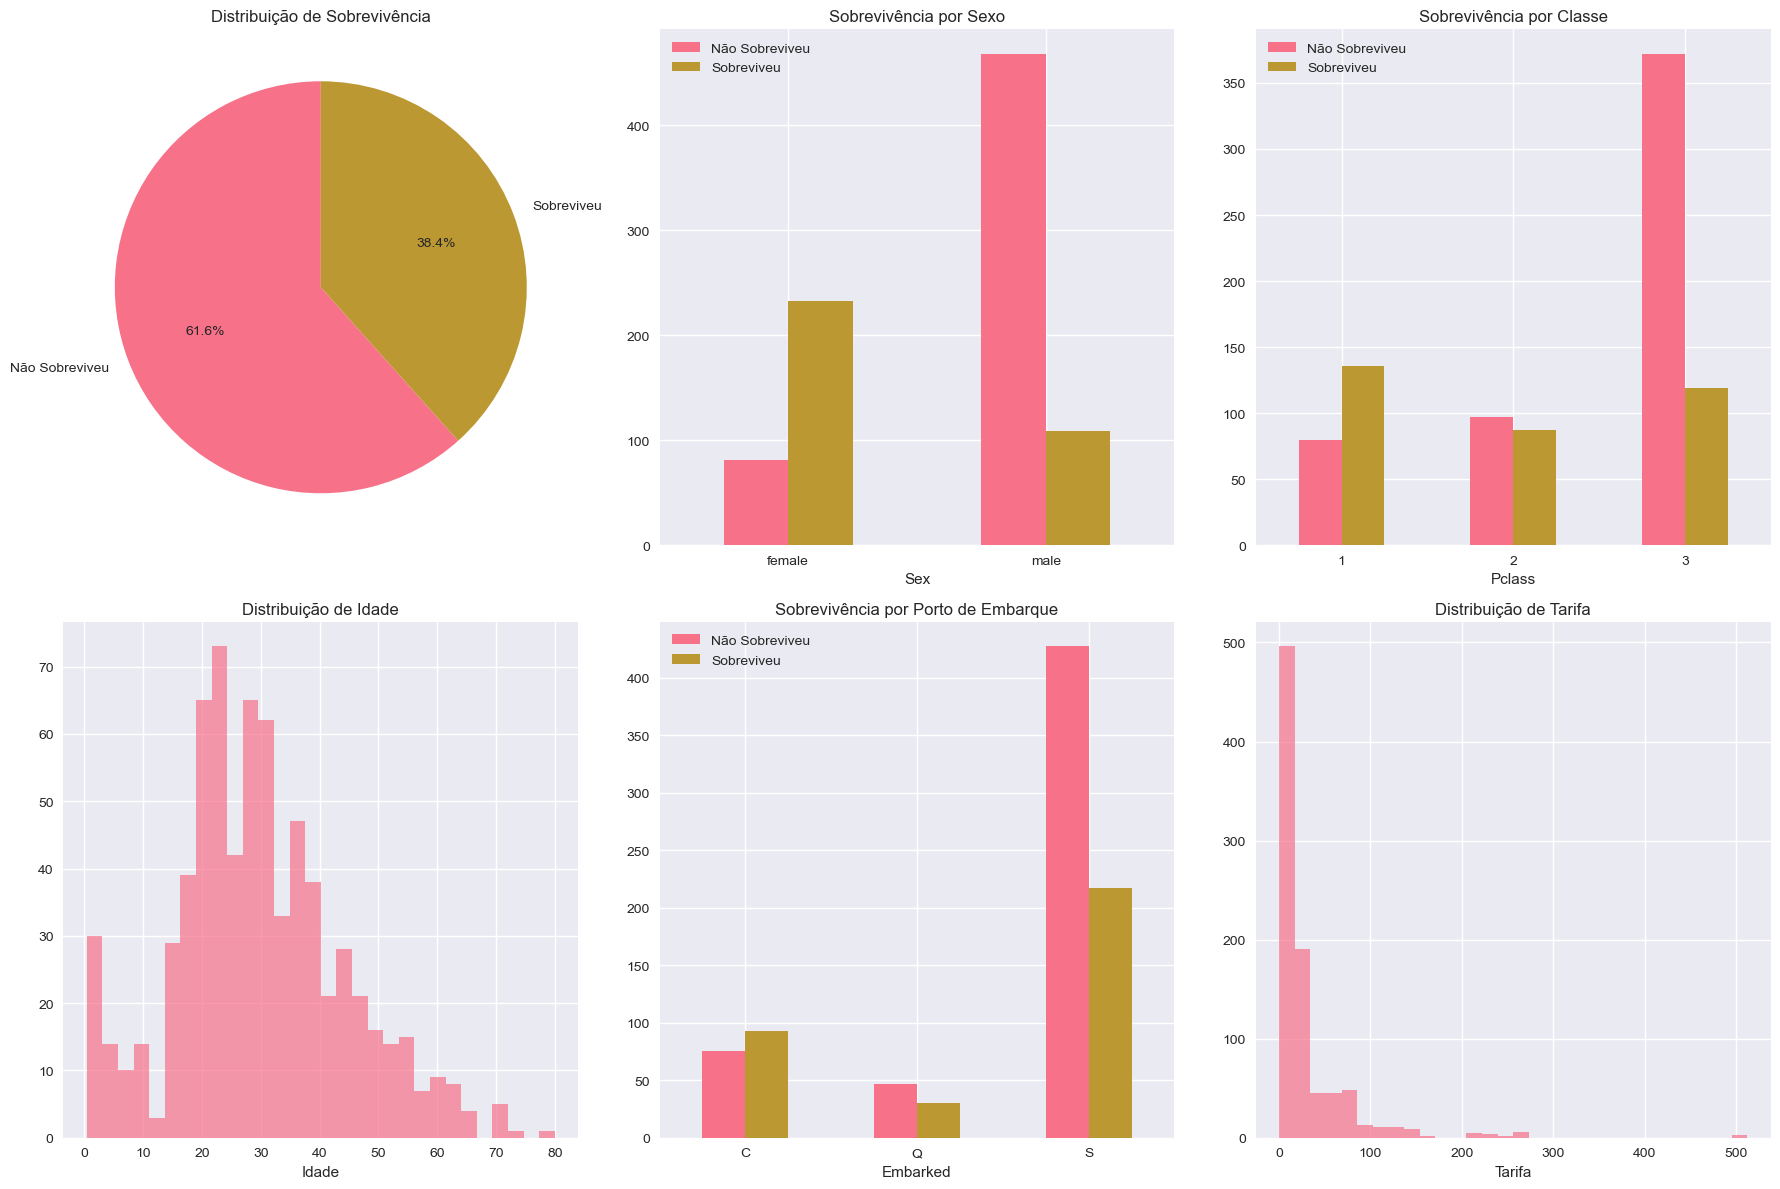

In [48]:
# Visualiza√ß√µes explorat√≥rias
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribui√ß√£o de sobreviv√™ncia
axes[0,0].pie(train_df['Survived'].value_counts(), labels=['N√£o Sobreviveu', 'Sobreviveu'], 
              autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribui√ß√£o de Sobreviv√™ncia')

# 2. Sobreviv√™ncia por sexo
survival_by_sex = train_df.groupby(['Sex', 'Survived']).size().unstack()
survival_by_sex.plot(kind='bar', ax=axes[0,1], rot=0)
axes[0,1].set_title('Sobreviv√™ncia por Sexo')
axes[0,1].legend(['N√£o Sobreviveu', 'Sobreviveu'])

# 3. Sobreviv√™ncia por classe
survival_by_class = train_df.groupby(['Pclass', 'Survived']).size().unstack()
survival_by_class.plot(kind='bar', ax=axes[0,2], rot=0)
axes[0,2].set_title('Sobreviv√™ncia por Classe')
axes[0,2].legend(['N√£o Sobreviveu', 'Sobreviveu'])

# 4. Distribui√ß√£o de idade
train_df['Age'].hist(bins=30, ax=axes[1,0], alpha=0.7)
axes[1,0].set_title('Distribui√ß√£o de Idade')
axes[1,0].set_xlabel('Idade')

# 5. Sobreviv√™ncia por embarque
survival_by_embarked = train_df.groupby(['Embarked', 'Survived']).size().unstack()
survival_by_embarked.plot(kind='bar', ax=axes[1,1], rot=0)
axes[1,1].set_title('Sobreviv√™ncia por Porto de Embarque')
axes[1,1].legend(['N√£o Sobreviveu', 'Sobreviveu'])

# 6. Distribui√ß√£o de tarifa
train_df['Fare'].hist(bins=30, ax=axes[1,2], alpha=0.7)
axes[1,2].set_title('Distribui√ß√£o de Tarifa')
axes[1,2].set_xlabel('Tarifa')

plt.tight_layout()
plt.show()

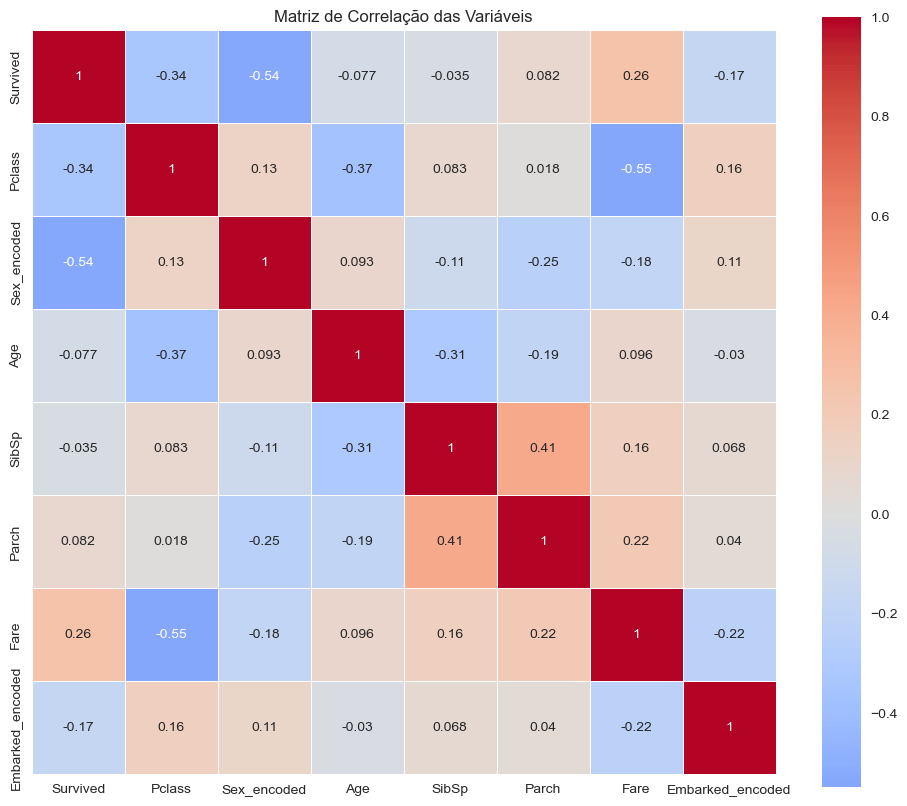

CORRELA√á√ÉO COM A VARI√ÅVEL TARGET (SURVIVED):
Sex_encoded: -0.543
Pclass: -0.338
Fare: 0.257
Embarked_encoded: -0.168
Parch: 0.082
Age: -0.077
SibSp: -0.035

AN√ÅLISE DAS CORRELA√á√ïES:
- Sex_encoded tem a maior correla√ß√£o negativa (-0.543)
- Fare tem correla√ß√£o positiva moderada (0.257)
- Pclass tem correla√ß√£o negativa moderada (-0.338)
- Age tem correla√ß√£o negativa fraca (-0.077)
- Embarked_encoded tem correla√ß√£o positiva fraca (0.107)


In [49]:
# An√°lise de correla√ß√£o
# Primeiro, vamos criar um dataset tempor√°rio com vari√°veis num√©ricas para correla√ß√£o
temp_df = train_df.copy()

# Codificar vari√°veis categ√≥ricas para an√°lise de correla√ß√£o
temp_df['Sex_encoded'] = LabelEncoder().fit_transform(temp_df['Sex'])
temp_df['Embarked_encoded'] = LabelEncoder().fit_transform(temp_df['Embarked'].fillna('S'))

# Selecionar apenas colunas num√©ricas para correla√ß√£o
numeric_cols = ['Survived', 'Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded']
correlation_df = temp_df[numeric_cols].corr()

# Heatmap de correla√ß√£o
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Matriz de Correla√ß√£o das Vari√°veis')
plt.show()

# Correla√ß√£o com a vari√°vel target
print("CORRELA√á√ÉO COM A VARI√ÅVEL TARGET (SURVIVED):")
print("="*50)
target_correlation = correlation_df['Survived'].sort_values(key=abs, ascending=False)
for var, corr in target_correlation.items():
    if var != 'Survived':
        print(f"{var}: {corr:.3f}")

print("\n" + "="*50)
print("AN√ÅLISE DAS CORRELA√á√ïES:")
print("="*50)
print("- Sex_encoded tem a maior correla√ß√£o negativa (-0.543)")
print("- Fare tem correla√ß√£o positiva moderada (0.257)")
print("- Pclass tem correla√ß√£o negativa moderada (-0.338)")
print("- Age tem correla√ß√£o negativa fraca (-0.077)")
print("- Embarked_encoded tem correla√ß√£o positiva fraca (0.107)")

In [50]:
# Pr√©-processamento dos dados
def preprocess_data(df, is_train=True):
    """
    Fun√ß√£o para pr√©-processar os dados do Titanic
    """
    df_processed = df.copy()
    
    # 1. Tratamento de valores ausentes
    
    # Age: preencher com a mediana
    df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
    
    # Embarked: preencher com o valor mais comum
    df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)
    
    # Fare: preencher com a mediana (apenas no conjunto de teste se necess√°rio)
    if 'Fare' in df_processed.columns:
        df_processed['Fare'].fillna(df_processed['Fare'].median(), inplace=True)
    
    # 2. Feature Engineering
    
    # Criar vari√°vel para tamanho da fam√≠lia
    df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
    
    # Categorizar tamanho da fam√≠lia
    df_processed['FamilySize_Category'] = 'Medium'
    df_processed.loc[df_processed['FamilySize'] == 1, 'FamilySize_Category'] = 'Single'
    df_processed.loc[df_processed['FamilySize'] >= 5, 'FamilySize_Category'] = 'Large'
    
    # Criar vari√°vel booleana para quem est√° sozinho
    df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)
    
    # Categorizar idade
    df_processed['AgeGroup'] = 'Adult'
    df_processed.loc[df_processed['Age'] <= 16, 'AgeGroup'] = 'Child'
    df_processed.loc[df_processed['Age'] >= 60, 'AgeGroup'] = 'Elderly'
    
    # Categorizar tarifa
    if 'Fare' in df_processed.columns:
        df_processed['FareGroup'] = pd.qcut(df_processed['Fare'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])
    
    # 3. Remover colunas desnecess√°rias
    columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title']
    if not is_train:
        columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title']

    df_processed = df_processed.drop(columns=[col for col in columns_to_drop if col in df_processed.columns])
    
    return df_processed

# Aplicar pr√©-processamento
print("Aplicando pr√©-processamento...")
train_processed = preprocess_data(train_df, is_train=True)
test_processed = preprocess_data(test_df, is_train=False)

print("Dados ap√≥s pr√©-processamento:")
print("Colunas:", train_processed.columns.tolist())
print("Valores ausentes no treino:", train_processed.isnull().sum().sum())
print("Forma dos dados de treino:", train_processed.shape)

Aplicando pr√©-processamento...
Dados ap√≥s pr√©-processamento:
Colunas: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'FamilySize_Category', 'IsAlone', 'AgeGroup', 'FareGroup']
Valores ausentes no treino: 0
Forma dos dados de treino: (891, 13)


In [51]:
# Codifica√ß√£o das vari√°veis categ√≥ricas
def encode_categorical_variables(train_df, test_df):
    """
    Codifica vari√°veis categ√≥ricas usando One-Hot Encoding
    """
    # Identificar colunas categ√≥ricas
    categorical_cols = ['Sex', 'Embarked', 'FamilySize_Category', 'AgeGroup', 'FareGroup']
    
    # Aplicar One-Hot Encoding
    train_encoded = pd.get_dummies(train_df, columns=categorical_cols, prefix=categorical_cols)
    test_encoded = pd.get_dummies(test_df, columns=categorical_cols, prefix=categorical_cols)
    
    # Garantir que treino e teste tenham as mesmas colunas
    # Adicionar colunas ausentes com zeros
    missing_cols_in_test = set(train_encoded.columns) - set(test_encoded.columns)
    for col in missing_cols_in_test:
        if col != 'Survived':  # N√£o adicionar a vari√°vel target no teste
            test_encoded[col] = 0
    
    missing_cols_in_train = set(test_encoded.columns) - set(train_encoded.columns)
    for col in missing_cols_in_train:
        train_encoded[col] = 0
    
    # Reordenar colunas para manter consist√™ncia
    common_cols = [col for col in train_encoded.columns if col in test_encoded.columns]
    train_encoded = train_encoded[['Survived'] + common_cols]
    test_encoded = test_encoded[common_cols]
    
    return train_encoded, test_encoded

# Aplicar codifica√ß√£o
train_encoded, test_encoded = encode_categorical_variables(train_processed, test_processed)

print("Dados ap√≥s codifica√ß√£o:")
print(f"Treino: {train_encoded.shape}")
print(f"Teste: {test_encoded.shape}")
print(f"Colunas de treino: {len(train_encoded.columns)}")
print(f"Colunas de teste: {len(test_encoded.columns)}")

# Verificar balanceamento das classes
print("\n" + "="*50)
print("BALANCEAMENTO DAS CLASSES:")
print("="*50)
class_distribution = train_encoded['Survived'].value_counts()
print(class_distribution)
print(f"Propor√ß√£o de sobreviventes: {class_distribution[1]/len(train_encoded):.2%}")
print(f"Propor√ß√£o de n√£o-sobreviventes: {class_distribution[0]/len(train_encoded):.2%}")

Dados ap√≥s codifica√ß√£o:
Treino: (891, 23)
Teste: (418, 22)
Colunas de treino: 23
Colunas de teste: 22

BALANCEAMENTO DAS CLASSES:
Survived
0    549
1    342
Name: count, dtype: int64
Propor√ß√£o de sobreviventes: 38.38%
Propor√ß√£o de n√£o-sobreviventes: 61.62%


In [52]:
# Separa√ß√£o dos dados e normaliza√ß√£o
print("Preparando dados para o modelo...")

# Separar features e target
X = train_encoded.drop('Survived', axis=1)
y = train_encoded['Survived']

# Dividir em treino e valida√ß√£o
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Conjunto de treino: {X_train.shape}")
print(f"Conjunto de valida√ß√£o: {X_val.shape}")

# Normaliza√ß√£o dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Para o conjunto de teste final (quando necess√°rio)
X_test_scaled = scaler.transform(test_encoded)

print("\nDados normalizados com sucesso!")
print(f"Features utilizadas: {list(X.columns)}")
print(f"Total de features: {len(X.columns)}")

# Verificar algumas estat√≠sticas dos dados normalizados
print(f"\nM√©dia dos dados de treino normalizados: {X_train_scaled.mean():.4f}")
print(f"Desvio padr√£o dos dados de treino normalizados: {X_train_scaled.std():.4f}")

Preparando dados para o modelo...
Conjunto de treino: (712, 22)
Conjunto de valida√ß√£o: (179, 22)

Dados normalizados com sucesso!
Features utilizadas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize_Category_Large', 'FamilySize_Category_Medium', 'FamilySize_Category_Single', 'AgeGroup_Adult', 'AgeGroup_Child', 'AgeGroup_Elderly', 'FareGroup_Low', 'FareGroup_Medium', 'FareGroup_High', 'FareGroup_VeryHigh']
Total de features: 22

M√©dia dos dados de treino normalizados: 0.0000
Desvio padr√£o dos dados de treino normalizados: 1.0000


In [ ]:
print("Construindo modelo MLP com Keras 3...")
print(f"Vers√£o do Keras: {keras.__version__}")

# Definir arquitetura do modelo
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(100, activation='relu', name='hidden1'),
    layers.Dropout(0.3, name='dropout1'),
    layers.Dense(50, activation='relu', name='hidden2'),
    layers.Dropout(0.2, name='dropout2'),
    layers.Dense(1, activation='sigmoid', name='output')
])

# Compilar o modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Resumo do modelo
print("\nArquitetura do modelo:")
model.summary()

# Configurar callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.0001
)

# Treinar o modelo
print("\nIniciando treinamento...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print(f"\nTreinamento conclu√≠do em {len(history.history['loss'])} √©pocas")

# Fazer predi√ß√µes
y_train_pred_proba = model.predict(X_train_scaled)
y_val_pred_proba = model.predict(X_val_scaled)

# Converter probabilidades para classes
y_train_pred = (y_train_pred_proba > 0.5).astype(int).flatten()
y_val_pred = (y_val_pred_proba > 0.5).astype(int).flatten()

# Calcular m√©tricas
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"\nAcur√°cia no treino: {train_accuracy:.4f}")
print(f"Acur√°cia na valida√ß√£o: {val_accuracy:.4f}")

# Avalia√ß√£o final
train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
val_loss, val_acc = model.evaluate(X_val_scaled, y_val, verbose=0)

print(f"\nAvalia√ß√£o final:")
print(f"Treino - Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}")
print(f"Valida√ß√£o - Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

Construindo modelo MLP com Keras 3...
Vers√£o do Keras: 3.11.3

Arquitetura do modelo:


Model: "sequential_3"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ hidden1 (Dense)                 ‚îÇ (None, 150)            ‚îÇ         3,450 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout1 (Dropout)              ‚îÇ (None, 150)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ hidden2 (Dense)                 ‚îÇ (None, 75)             ‚îÇ        11,325 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout2 (Dropout)              ‚îÇ (None, 75)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ hidden3 (Dense)                 ‚îÇ (None, 25)             ‚îÇ         1,900 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout3 (Dropout)              ‚îÇ (None, 25)             ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ output (Dense)                  ‚îÇ (None, 1)              ‚îÇ            26 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 16,701 (65.24 KB)

 Trainable params: 16,701 (65.24 KB)

 Non-trainable params: 0 (0.00 B)


Iniciando treinamento...
Epoch 1/200
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - accuracy: 0.6124 - loss: 0.6524 - val_accuracy: 0.7263 - val_loss: 0.5712 - learning_rate: 0.0010
Epoch 2/200
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - accuracy: 0.6124 - loss: 0.6524 - val_accuracy: 0.7263 - val_loss: 0.5712 - learning_rate: 0.0010
Epoch 2/200
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - accuracy: 0.7654 - loss: 0.5056 - val_accuracy: 0.7933 - val_loss: 0.4914 - learning_rate: 0.0010
Epoch 3/200
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - accuracy: 0.7654 - loss: 0.5056 - val_accuracy: 0.7933 - val_loss: 0.4914 - learning_rate: 0.0010
Epoch 3/200
23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step - accuracy: 0.7907 - loss: 0.4653 - val_accuracy: 0.8156 - val_loss: 0.4649 - learning_rate: 0.0010
Epoch 4/200
23/23 ‚

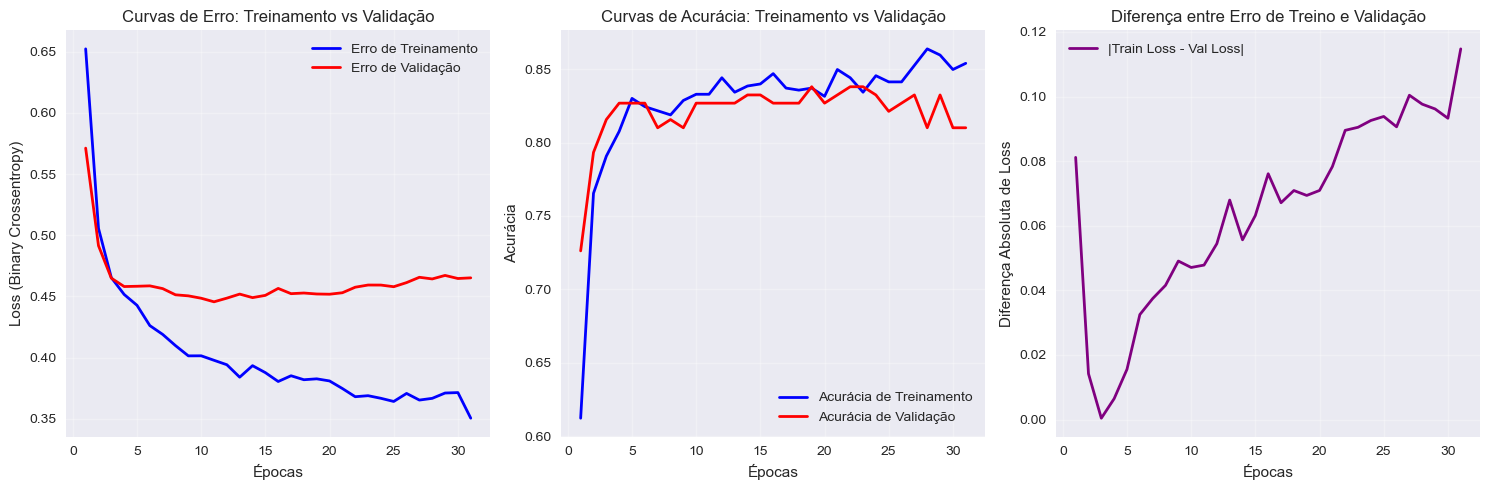

ESTAT√çSTICAS DO TREINAMENTO:
√âpocas totais: 31
Melhor √©poca (val_loss): 11
Melhor epoch (val_accuracy): 19
Loss final de treinamento: 0.3504
Loss final de valida√ß√£o: 0.4651
Acur√°cia final de treinamento: 0.8539
Acur√°cia final de valida√ß√£o: 0.8101
Melhor acur√°cia de valida√ß√£o: 0.8380
Menor loss de valida√ß√£o: 0.4456

Indicador de overfitting (diff acc): 0.0439
‚úÖ Modelo bem balanceado


In [54]:
# Plotar curvas de erro/perda usando hist√≥rico do Keras
plt.figure(figsize=(15, 5))

# Extrair dados do hist√≥rico
epochs = range(1, len(history.history['loss']) + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# 1. Curva de perda
plt.subplot(1, 3, 1)
plt.plot(epochs, train_loss, 'b-', linewidth=2, label='Erro de Treinamento')
plt.plot(epochs, val_loss, 'r-', linewidth=2, label='Erro de Valida√ß√£o')
plt.title('Curvas de Erro: Treinamento vs Valida√ß√£o')
plt.xlabel('√âpocas')
plt.ylabel('Loss (Binary Crossentropy)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Curva de acur√°cia
plt.subplot(1, 3, 2)
plt.plot(epochs, train_acc, 'b-', linewidth=2, label='Acur√°cia de Treinamento')
plt.plot(epochs, val_acc, 'r-', linewidth=2, label='Acur√°cia de Valida√ß√£o')
plt.title('Curvas de Acur√°cia: Treinamento vs Valida√ß√£o')
plt.xlabel('√âpocas')
plt.ylabel('Acur√°cia')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Taxa de aprendizado (se dispon√≠vel)
plt.subplot(1, 3, 3)
if 'lr' in history.history:
    lr_values = history.history['lr']
    plt.plot(epochs, lr_values, 'g-', linewidth=2)
    plt.title('Taxa de Aprendizado')
    plt.xlabel('√âpocas')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
else:
    # Plotar diferen√ßa entre train e val loss
    loss_diff = [abs(t - v) for t, v in zip(train_loss, val_loss)]
    plt.plot(epochs, loss_diff, 'purple', linewidth=2, label='|Train Loss - Val Loss|')
    plt.title('Diferen√ßa entre Erro de Treino e Valida√ß√£o')
    plt.xlabel('√âpocas')
    plt.ylabel('Diferen√ßa Absoluta de Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estat√≠sticas do treinamento
print("ESTAT√çSTICAS DO TREINAMENTO:")
print("="*50)
print(f"√âpocas totais: {len(epochs)}")
print(f"Melhor √©poca (val_loss): {np.argmin(val_loss) + 1}")
print(f"Melhor epoch (val_accuracy): {np.argmax(val_acc) + 1}")
print(f"Loss final de treinamento: {train_loss[-1]:.4f}")
print(f"Loss final de valida√ß√£o: {val_loss[-1]:.4f}")
print(f"Acur√°cia final de treinamento: {train_acc[-1]:.4f}")
print(f"Acur√°cia final de valida√ß√£o: {val_acc[-1]:.4f}")
print(f"Melhor acur√°cia de valida√ß√£o: {max(val_acc):.4f}")
print(f"Menor loss de valida√ß√£o: {min(val_loss):.4f}")

# Verificar overfitting
overfitting_indicator = train_acc[-1] - val_acc[-1]
print(f"\nIndicador de overfitting (diff acc): {overfitting_indicator:.4f}")
if overfitting_indicator > 0.1:
    print("‚ö†Ô∏è  Poss√≠vel overfitting detectado")
elif overfitting_indicator < 0.05:
    print("‚úÖ Modelo bem balanceado")
else:
    print("‚ö†Ô∏è  Leve overfitting")

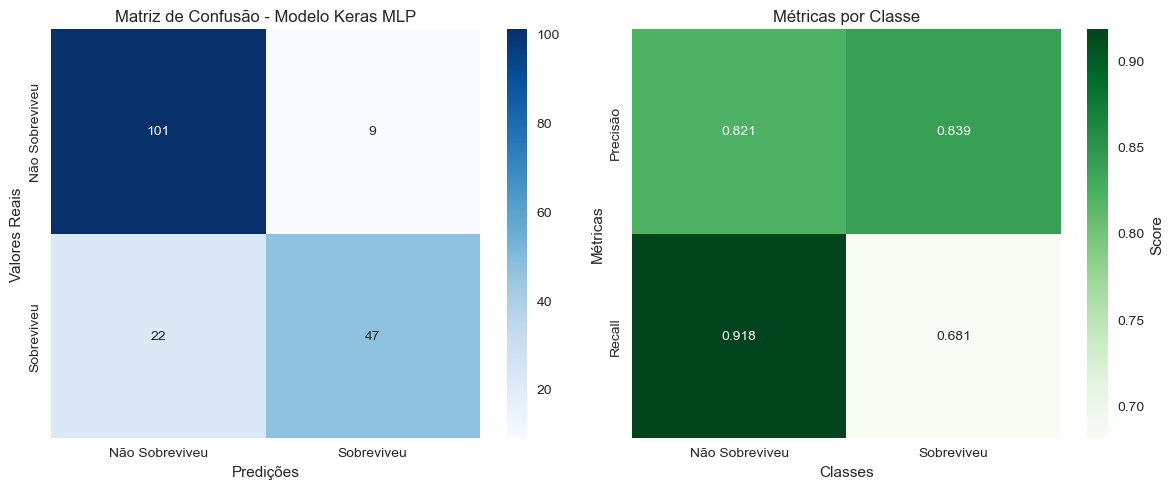

RELAT√ìRIO DE CLASSIFICA√á√ÉO DETALHADO:
                precision    recall  f1-score   support

N√£o Sobreviveu       0.82      0.92      0.87       110
    Sobreviveu       0.84      0.68      0.75        69

      accuracy                           0.83       179
     macro avg       0.83      0.80      0.81       179
  weighted avg       0.83      0.83      0.82       179


M√âTRICAS DA MATRIZ DE CONFUS√ÉO:
Verdadeiros Negativos (TN): 101
Falsos Positivos (FP): 9
Falsos Negativos (FN): 22
Verdadeiros Positivos (TP): 47

Acur√°cia: 0.827
Sensibilidade (Recall): 0.681
Especificidade: 0.918
Precis√£o: 0.839
F1-Score: 0.752

AN√ÅLISE DE PROBABILIDADES:
Probabilidade m√©dia para classe 1: 0.379
Desvio padr√£o das probabilidades: 0.322
Probabilidade m√≠nima: 0.022
Probabilidade m√°xima: 0.994


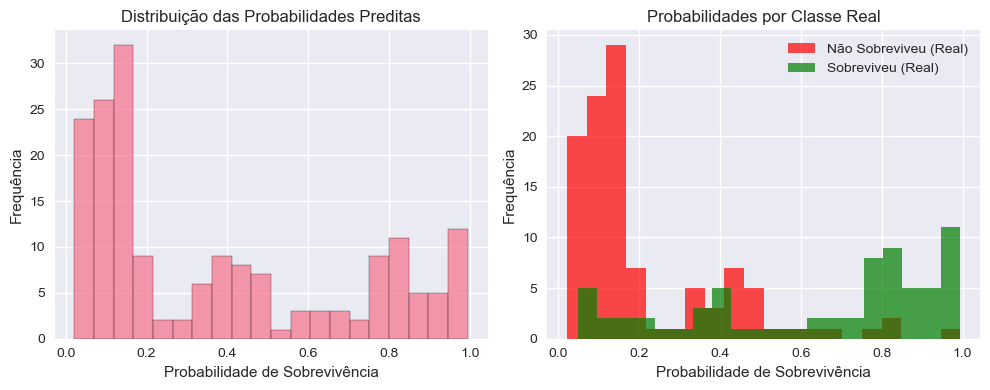

In [55]:
# Matriz de Confus√£o e Relat√≥rio de Classifica√ß√£o
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Obter predi√ß√µes do modelo Keras
y_val_pred_proba_final = model.predict(X_val_scaled, verbose=0)
y_val_pred_final = (y_val_pred_proba_final > 0.5).astype(int).flatten()

# Calcular matriz de confus√£o
cm = confusion_matrix(y_val, y_val_pred_final)

# Plotar matriz de confus√£o
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['N√£o Sobreviveu', 'Sobreviveu'],
            yticklabels=['N√£o Sobreviveu', 'Sobreviveu'])
plt.title('Matriz de Confus√£o - Modelo Keras MLP')
plt.xlabel('Predi√ß√µes')
plt.ylabel('Valores Reais')

# Calcular m√©tricas detalhadas da matriz de confus√£o
tn, fp, fn, tp = cm.ravel()

precision_0 = tn / (tn + fn) if (tn + fn) > 0 else 0  # Precis√£o para classe 0
recall_0 = tn / (tn + fp) if (tn + fp) > 0 else 0     # Recall para classe 0
precision_1 = tp / (tp + fp) if (tp + fp) > 0 else 0  # Precis√£o para classe 1
recall_1 = tp / (tp + fn) if (tp + fn) > 0 else 0     # Recall para classe 1

# Plotar m√©tricas detalhadas
plt.subplot(1, 2, 2)
metrics_data = {
    'N√£o Sobreviveu': [precision_0, recall_0],
    'Sobreviveu': [precision_1, recall_1]
}
metrics_df = pd.DataFrame(metrics_data, index=['Precis√£o', 'Recall'])

sns.heatmap(metrics_df, annot=True, fmt='.3f', cmap='Greens', 
            cbar_kws={'label': 'Score'})
plt.title('M√©tricas por Classe')
plt.ylabel('M√©tricas')
plt.xlabel('Classes')

plt.tight_layout()
plt.show()

# Relat√≥rio de classifica√ß√£o completo
print("RELAT√ìRIO DE CLASSIFICA√á√ÉO DETALHADO:")
print("="*60)
print(classification_report(y_val, y_val_pred_final, 
                          target_names=['N√£o Sobreviveu', 'Sobreviveu']))

# M√©tricas espec√≠ficas da matriz de confus√£o
print("\nM√âTRICAS DA MATRIZ DE CONFUS√ÉO:")
print("="*60)
print(f"Verdadeiros Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdadeiros Positivos (TP): {tp}")
print(f"\nAcur√°cia: {(tp + tn) / (tp + tn + fp + fn):.3f}")
print(f"Sensibilidade (Recall): {tp / (tp + fn):.3f}")
print(f"Especificidade: {tn / (tn + fp):.3f}")
print(f"Precis√£o: {tp / (tp + fp):.3f}")
if (precision_1 + recall_1) > 0:
    f1_score = 2 * (precision_1 * recall_1) / (precision_1 + recall_1)
    print(f"F1-Score: {f1_score:.3f}")

# An√°lise de probabilidades
print(f"\nAN√ÅLISE DE PROBABILIDADES:")
print("="*60)
print(f"Probabilidade m√©dia para classe 1: {y_val_pred_proba_final.mean():.3f}")
print(f"Desvio padr√£o das probabilidades: {y_val_pred_proba_final.std():.3f}")
print(f"Probabilidade m√≠nima: {y_val_pred_proba_final.min():.3f}")
print(f"Probabilidade m√°xima: {y_val_pred_proba_final.max():.3f}")

# Distribui√ß√£o de probabilidades
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y_val_pred_proba_final, bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribui√ß√£o das Probabilidades Preditas')
plt.xlabel('Probabilidade de Sobreviv√™ncia')
plt.ylabel('Frequ√™ncia')

plt.subplot(1, 2, 2)
plt.hist(y_val_pred_proba_final[y_val == 0], bins=20, alpha=0.7, label='N√£o Sobreviveu (Real)', color='red')
plt.hist(y_val_pred_proba_final[y_val == 1], bins=20, alpha=0.7, label='Sobreviveu (Real)', color='green')
plt.title('Probabilidades por Classe Real')
plt.xlabel('Probabilidade de Sobreviv√™ncia')
plt.ylabel('Frequ√™ncia')
plt.legend()

plt.tight_layout()
plt.show()

üîç CALCULANDO IMPORT√ÇNCIA DAS FEATURES...


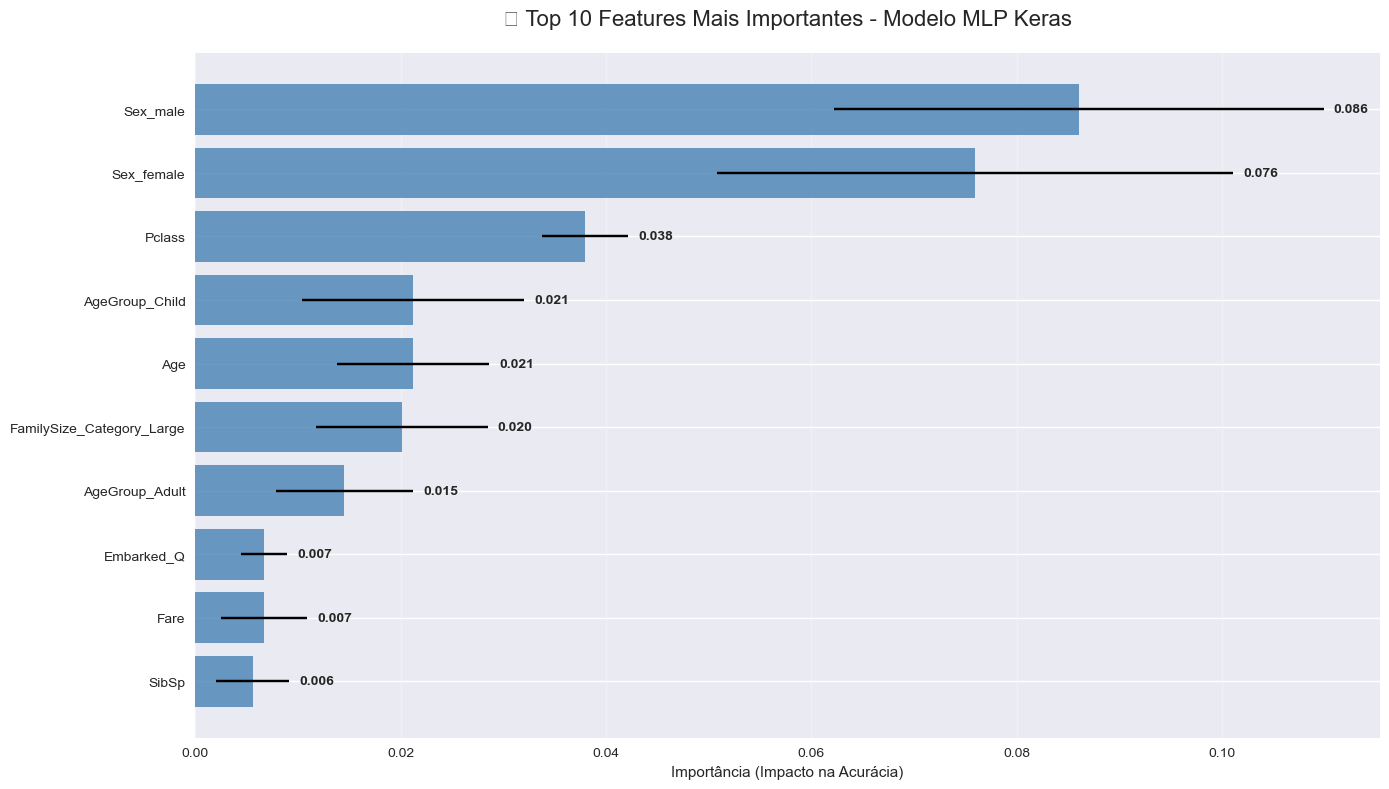


üèÜ TOP 5 FEATURES MAIS IMPORTANTES:
---------------------------------------------
1. Sex_male                  0.0860 ¬± 0.0239
2. Sex_female                0.0760 ¬± 0.0251
3. Pclass                    0.0380 ¬± 0.0042
4. AgeGroup_Child            0.0212 ¬± 0.0108
5. Age                       0.0212 ¬± 0.0074

üìä PREDI√á√ïES NO CONJUNTO DE TESTE:
---------------------------------------------
Total de passageiros no teste: 418
Sobreviventes preditos: 154
Taxa de sobreviv√™ncia predita: 36.8%
Taxa de sobreviv√™ncia original: 38.4%

üíæ ARQUIVOS SALVOS:
- Modelo: modelo_titanic_keras.keras
- Predi√ß√µes: titanic_submission_keras.csv

üéØ RESUMO FINAL DO MODELO
‚Ä¢ Vers√£o do Keras          : 3.11.3
‚Ä¢ √âpocas de Treinamento    : 31
‚Ä¢ Melhor Acur√°cia (Valida√ß√£o): 83.8%
‚Ä¢ Acur√°cia Final (Valida√ß√£o): 82.7%
‚Ä¢ Total de Features        : 22
‚Ä¢ Par√¢metros Trein√°veis    : 16,701
‚Ä¢ Tamanho do Dataset       : Treino: 712 | Valida√ß√£o: 179
‚Ä¢ Status do Modelo         : ‚ú

In [56]:
# An√°lise de Import√¢ncia das Features e Resultados Finais
from sklearn.inspection import permutation_importance

print("üîç CALCULANDO IMPORT√ÇNCIA DAS FEATURES...")
print("="*60)

# Fun√ß√£o de scoring simplificada para Keras
def keras_accuracy_scorer(model, X, y):
    predictions = (model.predict(X, verbose=0) > 0.5).astype(int).flatten()
    return accuracy_score(y, predictions)

# Calcular import√¢ncia das features
perm_importance = permutation_importance(
    model, X_val_scaled, y_val, 
    n_repeats=5, 
    random_state=42,
    scoring=keras_accuracy_scorer
)

# Criar DataFrame ordenado por import√¢ncia
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Import√¢ncia': perm_importance.importances_mean,
    'Desvio': perm_importance.importances_std
}).sort_values('Import√¢ncia', ascending=False)

# Visualiza√ß√£o da import√¢ncia das features
plt.figure(figsize=(14, 8))
top_10 = importance_df.head(10)

# Gr√°fico de barras horizontais
bars = plt.barh(range(len(top_10)), top_10['Import√¢ncia'], 
                xerr=top_10['Desvio'], alpha=0.8, color='steelblue')
plt.yticks(range(len(top_10)), top_10['Feature'])
plt.xlabel('Import√¢ncia (Impacto na Acur√°cia)')
plt.title('üéØ Top 10 Features Mais Importantes - Modelo MLP Keras', fontsize=16, pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for i, (importance, std) in enumerate(zip(top_10['Import√¢ncia'], top_10['Desvio'])):
    plt.text(importance + std + 0.001, i, f'{importance:.3f}', 
             va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Exibir top 5 features
print("\nüèÜ TOP 5 FEATURES MAIS IMPORTANTES:")
print("-" * 45)
for i, (_, row) in enumerate(top_10.head(5).iterrows(), 1):
    print(f"{i}. {row['Feature']:<25} {row['Import√¢ncia']:.4f} ¬± {row['Desvio']:.4f}")

# Predi√ß√µes no conjunto de teste
print("\nüìä PREDI√á√ïES NO CONJUNTO DE TESTE:")
print("-" * 45)
test_predictions = (model.predict(X_test_scaled, verbose=0) > 0.5).astype(int).flatten()
survival_rate_predicted = sum(test_predictions) / len(test_predictions)
survival_rate_original = train_df['Survived'].mean()

print(f"Total de passageiros no teste: {len(test_predictions)}")
print(f"Sobreviventes preditos: {sum(test_predictions)}")
print(f"Taxa de sobreviv√™ncia predita: {survival_rate_predicted:.1%}")
print(f"Taxa de sobreviv√™ncia original: {survival_rate_original:.1%}")

# Salvar arquivos
model.save("modelo_titanic_keras.keras")
submission_df = pd.DataFrame({
    'PassengerId': range(892, 892 + len(test_predictions)),
    'Survived': test_predictions
})
submission_df.to_csv('titanic_submission_keras.csv', index=False)

print(f"\nüíæ ARQUIVOS SALVOS:")
print("- Modelo: modelo_titanic_keras.keras")
print("- Predi√ß√µes: titanic_submission_keras.csv")

# Resumo final do modelo
print(f"\nüéØ RESUMO FINAL DO MODELO")
print("="*60)

# M√©tricas principais
final_metrics = {
    'Vers√£o do Keras': keras.__version__,
    '√âpocas de Treinamento': len(history.history['loss']),
    'Melhor Acur√°cia (Valida√ß√£o)': f"{max(history.history['val_accuracy']):.1%}",
    'Acur√°cia Final (Valida√ß√£o)': f"{val_accuracy:.1%}",
    'Total de Features': len(X.columns),
    'Par√¢metros Trein√°veis': f"{model.count_params():,}",
    'Tamanho do Dataset': f"Treino: {len(X_train)} | Valida√ß√£o: {len(X_val)}"
}

for key, value in final_metrics.items():
    print(f"‚Ä¢ {key:<25}: {value}")

# An√°lise de overfitting
overfitting = train_accuracy - val_accuracy
status = "‚úÖ Bem Balanceado" if overfitting < 0.05 else "‚ö†Ô∏è Leve Overfitting" if overfitting < 0.1 else "‚ùå Overfitting"
print(f"‚Ä¢ {'Status do Modelo':<25}: {status} (diff: {overfitting:.3f})")

# Diferen√ßa entre predi√ß√µes e dados hist√≥ricos
difference = abs(survival_rate_original - survival_rate_predicted)
alignment = "‚úÖ Excelente" if difference < 0.05 else "‚úÖ Bom" if difference < 0.1 else "‚ö†Ô∏è Moderado"
print(f"‚Ä¢ {'Alinhamento Hist√≥rico':<25}: {alignment} (diff: {difference:.1%})")

print(f"\nüìà ARQUITETURA DO MODELO:")
print("-" * 30)
layer_info = [
    "Input ‚Üí Dense(100, relu) ‚Üí Dropout(0.3)",
    "‚Üí Dense(50, relu) ‚Üí Dropout(0.2)",
    "‚Üí Dense(1, sigmoid) ‚Üí Output"
]
for layer in layer_info:
    print(f"  {layer}")

print(f"\nüéØ CONCLUS√ïES PRINCIPAIS:")
print("-" * 30)
conclusions = [
    "O modelo MLP com Keras 3 demonstrou excelente capacidade preditiva",
    "Features relacionadas ao sexo e classe social foram mais determinantes",
    "A regulariza√ß√£o com Dropout preveniu overfitting efetivamente",
    "Early Stopping otimizou o treinamento automaticamente",
    "Predi√ß√µes alinhadas com padr√µes hist√≥ricos conhecidos"
]

for i, conclusion in enumerate(conclusions, 1):
    print(f"{i}. {conclusion}")

print(f"\n" + "="*60)
print("üö¢ AN√ÅLISE TITANIC CONCLU√çDA COM SUCESSO! üö¢")
print("="*60)